In [1]:
# %matplotlib notebook
import requests
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup

In [2]:
def try_float_prop(x, c):
    try:
        y = float(x.find('span',class_=c).text)
    except:
        y = None
    return y

from datetime import datetime, timedelta
day = timedelta(days=1)

def posted(x):
    try:
        y = x.find('span',class_='pt').text
        d = datetime.strptime(y,"%m/%d - %H:%M")
        d = d.replace(year=2019)
        y = ((datetime.now() - d) / day)
    except:
        y = None
    return y

def get_cars(make,model,yr):
    url = "https://cargraph.com/usa/{}/{}/{}".format(make,model,yr)
    print(url)
    r = requests.get("https://cargraph.com/usa/{}/{}/{}".format(make,model,yr))
    soup = BeautifulSoup(r.content)

    cars = []
    for x in soup.find_all('div', class_='row'):
        year = try_float_prop(x,'y')
        miles = try_float_prop(x,'mi')
        price = try_float_prop(x,'p')
        pt = posted(x)
        cars.append((make,model,year,miles,price,pt))

    return [car for car in cars if all(car)]

def miles(car):
    return car[3]

def price(car):
    return car[4]

def year(car):
    return car[2]

def get_cars_years(make,model,years):
    return set([car for car in get_cars(make,model,year) for year in years])

In [3]:
# priuses = [car for yr in range(2013,2021) for car in get_cars("toyota","prius",yr) if price(car)<40000 and miles(car)>25000]
all_priuses = [('toyota', 'prius', 2013.0, 59014.0, 13995.0, 22.133071303449075),
 ('toyota', 'prius', 2013.0, 70000.0, 9900.0, -0.5474842421527778),
 ('toyota', 'prius', 2013.0, 84507.0, 14998.0, 22.21779354375),
 ('toyota', 'prius', 2013.0, 76000.0, 8300.0, -0.3829008967013889),
 ('toyota', 'prius', 2013.0, 41868.0, 15998.0, 22.21779355574074),
 ('toyota', 'prius', 2013.0, 40631.0, 13991.0, 22.135154678842593),
 ('toyota', 'prius', 2013.0, 74000.0, 10532.0, 145.18932135427085),
 ('toyota', 'prius', 2013.0, 69703.0, 12900.0, 22.178904691585647),
 ('toyota', 'prius', 2013.0, 37000.0, 15850.0, -0.37873419333333336),
 ('toyota', 'prius', 2013.0, 33000.0, 13995.0, 22.137238036898147),
 ('toyota', 'prius', 2013.0, 75000.0, 9500.0, -0.35442862578703704),
 ('toyota', 'prius', 2013.0, 35000.0, 11100.0, 67.98654360039352),
 ('toyota', 'prius', 2013.0, 97109.0, 11991.0, 22.096960271018517),
 ('toyota', 'prius', 2013.0, 128882.0, 8359.0, 22.097654727395835),
 ('toyota', 'prius', 2013.0, 39000.0, 13759.0, 22.09904362422454),
 ('toyota', 'prius', 2013.0, 65000.0, 13990.0, 0.3101547393287037),
 ('toyota', 'prius', 2013.0, 37000.0, 12950.0, 22.103210321516205),
 ('toyota', 'prius', 2013.0, 130000.0, 9500.0, 1.4927936669791666),
 ('toyota', 'prius', 2013.0, 63430.0, 12995.0, 22.23307145681713),
 ('toyota', 'prius', 2013.0, 120000.0, 7600.0, 2.3712659132407405),
 ('toyota', 'prius', 2013.0, 74000.0, 9000.0, 2.6823770322916665),
 ('toyota', 'prius', 2013.0, 46000.0, 13982.0, 22.235849258483796),
 ('toyota', 'prius', 2013.0, 73428.0, 14991.0, 22.11362704420139),
 ('toyota', 'prius', 2013.0, 200000.0, 7950.0, 3.3177937299537037),
 ('toyota', 'prius', 2013.0, 88180.0, 12998.0, 23.088627077650465),
 ('toyota', 'prius', 2013.0, 89466.0, 14599.0, 23.13029375619213),
 ('toyota', 'prius', 2013.0, 76985.0, 11990.0, 23.088627103159723),
 ('toyota', 'prius', 2013.0, 65000.0, 13990.0, 4.444877107835648),
 ('toyota', 'prius', 2013.0, 63621.0, 12395.0, 23.130988223530093),
 ('toyota', 'prius', 2013.0, 96000.0, 7900.0, 4.6490437835763885),
 ('toyota', 'prius', 2013.0, 74000.0, 9000.0, 4.69765490369213),
 ('toyota', 'prius', 2013.0, 75000.0, 11000.0, 5.379599361689815),
 ('toyota', 'prius', 2013.0, 143000.0, 8999.0, 5.449738259525463),
 ('toyota', 'prius', 2013.0, 112000.0, 8900.0, 7.4025160783680555),
 ('toyota', 'prius', 2013.0, 74000.0, 9000.0, 7.492099420717593),
 ('toyota', 'prius', 2013.0, 185000.0, 5950.0, 8.643488344004629),
 ('toyota', 'prius', 2014.0, 80424.0, 13000.0, 22.133073873333334),
 ('toyota', 'prius', 2014.0, 48655.0, 17998.0, 22.09279610804398),
 ('toyota', 'prius', 2014.0, 102000.0, 9997.0, 59.38724056059028),
 ('toyota', 'prius', 2014.0, 67508.0, 14991.0, 22.220573909988428),
 ('toyota', 'prius', 2014.0, 39395.0, 18998.0, 22.220573918032407),
 ('toyota', 'prius', 2014.0, 44531.0, 16577.0, 22.097657259363427),
 ('toyota', 'prius', 2014.0, 68000.0, 12495.0, 2.253212818912037),
 ('toyota', 'prius', 2014.0, 35000.0, 11999.0, 22.098351711782406),
 ('toyota', 'prius', 2014.0, 68000.0, 12495.0, 2.2573794935879627),
 ('toyota', 'prius', 2014.0, 115000.0, 10900.0, 2.2698795015740743),
 ('toyota', 'prius', 2014.0, 66293.0, 14472.0, 22.102518394560185),
 ('toyota', 'prius', 2014.0, 141000.0, 10000.0, 2.596962842997685),
 ('toyota', 'prius', 2014.0, 109496.0, 9677.0, 22.103907291400464),
 ('toyota', 'prius', 2014.0, 82000.0, 7500.0, 3.4275184144675928),
 ('toyota', 'prius', 2014.0, 106361.0, 10953.0, 22.148351751770832),
 ('toyota', 'prius', 2014.0, 187000.0, 8800.0, 4.657379541527778),
 ('toyota', 'prius', 2014.0, 76912.0, 11993.0, 22.11293510107639),
 ('toyota', 'prius', 2014.0, 117000.0, 9450.0, 5.746962882824074),
 ('toyota', 'prius', 2014.0, 113963.0, 11494.0, 22.159462886782407),
 ('toyota', 'prius', 2014.0, 72000.0, 12490.0, 5.752518446319445),
 ('toyota', 'prius', 2014.0, 71218.0, 11994.0, 22.1184906725),
 ('toyota', 'prius', 2014.0, 48924.0, 13786.0, 23.08862957738426),
 ('toyota', 'prius', 2014.0, 100000.0, 7800.0, 8.531685136909722),
 ('toyota', 'prius', 2014.0, 98531.0, 10979.0, 23.08862958534722),
 ('toyota', 'prius', 2014.0, 43015.0, 16977.0, 23.134462926689814),
 ('toyota', 'prius', 2014.0, 29695.0, 16599.0, 23.140018490266204),
 ('toyota', 'prius', 2014.0, 44640.0, 16900.0, 23.140712942662038),
 ('toyota', 'prius', 2014.0, 56478.0, 13990.0, 23.18237961728009),
 ('toyota', 'prius', 2014.0, 114959.0, 11060.0, 23.09974073729167),
 ('toyota', 'prius', 2014.0, 83861.0, 13000.0, 23.099740745266203),
 ('toyota', 'prius', 2015.0, 91314.0, 11911.0, 22.13307795650463),
 ('toyota', 'prius', 2015.0, 37000.0, 16375.0, -0.4558109197685185),
 ('toyota', 'prius', 2015.0, 46000.0, 14500.0, 74.84696686222222),
 ('toyota', 'prius', 2015.0, 45358.0, 16991.0, 22.133772421828702),
 ('toyota', 'prius', 2015.0, 68432.0, 16998.0, 22.217800216689813),
 ('toyota', 'prius', 2015.0, 37739.0, 19998.0, 22.13446689949074),
 ('toyota', 'prius', 2015.0, 89352.0, 12995.0, 22.092800251805556),
 ('toyota', 'prius', 2015.0, 65000.0, 13500.0, 0.4115502655439815),
 ('toyota', 'prius', 2015.0, 61000.0, 13000.0, 88.35738360476851),
 ('toyota', 'prius', 2015.0, 35385.0, 13988.0, 22.094883609421295),
 ('toyota', 'prius', 2015.0, 65000.0, 13500.0, 0.43516139172453705),
 ('toyota', 'prius', 2015.0, 57000.0, 16791.0, 22.09488362309028),
 ('toyota', 'prius', 2015.0, 90019.0, 14790.0, 22.09557807642361),
 ('toyota', 'prius', 2015.0, 136095.0, 11595.0, 22.222661420138888),
 ('toyota', 'prius', 2015.0, 27000.0, 16235.0, 22.22405031806713),
 ('toyota', 'prius', 2015.0, 54480.0, 17910.0, 22.099744774768517),
 ('toyota', 'prius', 2015.0, 100000.0, 16000.0, 22.228217027777777),
 ('toyota', 'prius', 2015.0, 65899.0, 16482.0, 22.103911485138887),
 ('toyota', 'prius', 2015.0, 27000.0, 17734.0, 22.146272617002314),
 ('toyota', 'prius', 2015.0, 144000.0, 9800.0, 1.7434948433680555),
 ('toyota', 'prius', 2015.0, 26989.0, 17925.0, 22.23099484741898),
 ('toyota', 'prius', 2015.0, 67662.0, 13400.0, 22.10807819372685),
 ('toyota', 'prius', 2015.0, 38401.0, 16998.0, 22.23307820184028),
 ('toyota', 'prius', 2015.0, 80982.0, 13999.0, 22.23516154334491),
 ('toyota', 'prius', 2015.0, 43000.0, 17492.0, 22.19696711497685),
 ('toyota', 'prius', 2015.0, 87428.0, 11794.0, 22.117106025856483),
 ('toyota', 'prius', 2015.0, 34028.0, 17491.0, 22.243494924247685),
 ('toyota', 'prius', 2015.0, 37000.0, 15800.0, 4.574744933425926),
 ('toyota', 'prius', 2015.0, 32000.0, 20995.0, 5.242106066574074),
 ('toyota', 'prius', 2015.0, 89000.0, 12999.0, 6.782383888078703),
 ('toyota', 'prius', 2015.0, 64000.0, 15000.0, 7.580300589027778),
 ('toyota', 'prius', 2015.0, 45000.0, 16900.0, 8.490717274699074),
 ('toyota', 'prius', 2015.0, 38000.0, 13500.0, 9.501828402071759),
 ('toyota', 'prius', 2015.0, 71000.0, 12500.0, 9.621967299004629),
 ('toyota', 'prius', 2016.0, 54000.0, 16986.0, 23.735165327233798),
 ('toyota', 'prius', 2016.0, 38000.0, 16998.0, 0.6532209039930555),
 ('toyota', 'prius', 2016.0, 53759.0, 17995.0, 22.09210980476852),
 ('toyota', 'prius', 2016.0, 26796.0, 20998.0, 22.13377649133102),
 ('toyota', 'prius', 2016.0, 47015.0, 21887.0, 22.21710983302083),
 ('toyota', 'prius', 2016.0, 100000.0, 20491.0, 22.092109842638887),
 ('toyota', 'prius', 2016.0, 70090.0, 19998.0, 22.21710985097222),
 ('toyota', 'prius', 2016.0, 49249.0, 20990.0, 22.175443192696758),
 ('toyota', 'prius', 2016.0, 40080.0, 18998.0, 22.21710986761574),
 ('toyota', 'prius', 2016.0, 25764.0, 18998.0, 22.176137658148146),
 ('toyota', 'prius', 2016.0, 53396.0, 17147.0, 22.217804351261574),
 ('toyota', 'prius', 2016.0, 108531.0, 14988.0, 22.217804369953704),
 ('toyota', 'prius', 2016.0, 31000.0, 20981.0, 22.21780438060185),
 ('toyota', 'prius', 2016.0, 100000.0, 17700.0, 22.093498896574076),
 ('toyota', 'prius', 2016.0, 59424.0, 19490.0, 22.218498911851853),
 ('toyota', 'prius', 2016.0, 48000.0, 19998.0, 22.09488781818287),
 ('toyota', 'prius', 2016.0, 44548.0, 19688.0, 22.221276731493056),
 ('toyota', 'prius', 2016.0, 26000.0, 19500.0, 6.724748982974537),
 ('toyota', 'prius', 2016.0, 64896.0, 18886.0, 22.096971218194444),
 ('toyota', 'prius', 2016.0, 38000.0, 17998.0, 7.582387898865741),
 ('toyota', 'prius', 2016.0, 63000.0, 16950.0, 10.80391575394676),
 ('toyota', 'prius', 2016.0, 38000.0, 17998.0, 14.394193580983796),
 ('toyota', 'prius', 2016.0, 150000.0, 11250.0, 14.29836025287037),
 ('toyota', 'prius', 2017.0, 100000.0, 21990.0, 22.135168480081017),
 ('toyota', 'prius', 2017.0, 27407.0, 20991.0, 22.13655740753472),
 ('toyota', 'prius', 2017.0, 100000.0, 19991.0, 22.220585214305554),
 ('toyota', 'prius', 2017.0, 28189.0, 20495.0, 22.221279742060187),
 ('toyota', 'prius', 2017.0, 94000.0, 13900.0, 10.251835302175927),
 ('toyota', 'prius', 2017.0, 53581.0, 18274.0, 22.097668666712963),
 ('toyota', 'prius', 2017.0, 38163.0, 19887.0, 22.182390905266203),
 ('toyota', 'prius', 2017.0, 83501.0, 16311.0, 22.183779802222222),
 ('toyota', 'prius', 2017.0, 26000.0, 20500.0, 15.218502058101851),
 ('toyota', 'prius', 2017.0, 100000.0, 24995.0, 22.103918728819444),
 ('toyota', 'prius', 2017.0, 33520.0, 19999.0, 22.230307635462964),
 ('toyota', 'prius', 2017.0, 41572.0, 19500.0, 22.231696535104167),
 ('toyota', 'prius', 2017.0, 94447.0, 12995.0, 22.150446572777778),
 ('toyota', 'prius', 2017.0, 31000.0, 17000.0, 28.66919669826389),
 ('toyota', 'prius', 2018.0, 27000.0, 22900.0, 22.091421611203703),
 ('toyota', 'prius', 2018.0, 30610.0, 21097.0, 22.092116132858795),
 ('toyota', 'prius', 2018.0, 32000.0, 19950.0, 22.217810605358796),
 ('toyota', 'prius', 2018.0, 27236.0, 23743.0, 22.13586617925926),
 ('toyota', 'prius', 2018.0, 29000.0, 23500.0, 13.560866201631944),
 ('toyota', 'prius', 2018.0, 36271.0, 20445.0, 22.099060650486113),
 ('toyota', 'prius', 2018.0, 100000.0, 25206.0, 22.099755103819444),
 ('toyota', 'prius', 2018.0, 33540.0, 18950.0, 22.106005175555556),
 ('toyota', 'prius', 2018.0, 50186.0, 18477.0, 22.10808851773148),
 ('toyota', 'prius', 2018.0, 100000.0, 23999.0, 22.151144083449076),
 ('toyota', 'prius', 2018.0, 54513.0, 17582.0, 22.2476719040625),
 ('toyota', 'prius', 2018.0, 36638.0, 19177.0, 22.124060801828705),
 ('toyota', 'prius', 2018.0, 31971.0, 17996.0, 22.12406080994213),
 ('toyota', 'prius', 2019.0, 100000.0, 27600.0, 22.10253525502315),
 ('toyota', 'prius', 2019.0, 100000.0, 23388.0, 24.217118668645835),
 ('toyota', 'prius', 2019.0, 100000.0, 24989.0, 24.232396470451388),
 ('toyota', 'prius', 2019.0, 100000.0, 27488.0, 25.22197983650463),
 ('toyota', 'prius', 2019.0, 100000.0, 26804.0, 25.10045206269676),
 ('toyota', 'prius', 2011.0, 89929.0, 12495.0, 22.13309390300926),
 ('toyota', 'prius', 2018.0, 27000.0, 22900.0, 22.091427259409723),
 ('toyota', 'prius', 2014.0, 80424.0, 13000.0, 22.13309395201389),
 ('toyota', 'prius', 2013.0, 59014.0, 13995.0, 22.133093968506945),
 ('toyota', 'prius', 2007.0, 138001.0, 5900.0, 22.174760647407407),
 ('toyota', 'prius', 2015.0, 65000.0, 13500.0, 0.4115662111226852),
 ('toyota', 'prius', 2015.0, 91314.0, 11911.0, 22.133093993252317),
 ('toyota', 'prius', 2013.0, 65000.0, 13990.0, 0.3101773538888889),
 ('toyota', 'prius', 2015.0, 65000.0, 13500.0, 0.4351773664236111),
 ('toyota', 'prius', 2007.0, 209395.0, 2200.0, 22.174760703958334),
 ('toyota', 'prius', 2009.0, 196000.0, 3000.0, 0.43656626990740743),
 ('toyota', 'prius', 2007.0, 201452.0, 3995.0, 22.09142738597222),
 ('toyota', 'prius', 2016.0, 53759.0, 17995.0, 22.092121859016203),
 ('toyota', 'prius', 2016.0, 26796.0, 20998.0, 22.133788554074073),
 ('toyota', 'prius', 2016.0, 47015.0, 21887.0, 22.21712190179398),
 ('toyota', 'prius', 2016.0, 100000.0, 20491.0, 22.092121915625),
 ('toyota', 'prius', 2016.0, 70090.0, 19998.0, 22.21712194681713),
 ('toyota', 'prius', 2016.0, 49249.0, 20990.0, 22.175455298402778),
 ('toyota', 'prius', 2009.0, 109996.0, 10598.0, 22.092121979641203),
 ('toyota', 'prius', 2008.0, 175000.0, 2008.0, 0.3685108771643518),
 ('toyota', 'prius', 2010.0, 125247.0, 10599.0, 22.133788659131945),
 ('toyota', 'prius', 2018.0, 30610.0, 21097.0, 22.092122007824074),
 ('toyota', 'prius', 2015.0, 45358.0, 16991.0, 22.133788694270834),
 ('toyota', 'prius', 2016.0, 40080.0, 18998.0, 22.21712204357639),
 ('toyota', 'prius', 2011.0, 103692.0, 10998.0, 22.092816497199074),
 ('toyota', 'prius', 2016.0, 38000.0, 16998.0, 0.6532332185416667),
 ('toyota', 'prius', 2004.0, 157000.0, 3000.0, 0.7226777025925926),
 ('toyota', 'prius', 2008.0, 201000.0, 4600.0, 0.61712215125)]
priuses = all_priuses[:100]

In [4]:
# bmws = [car for yr in range(2013,2021) for car in get_cars("bmw","5",yr) if price(car)<40000 and miles(car)>25000]
all_bmws = [('bmw', '5', 2013.0, 93404.0, 13999.0, 22.09145859494213),
 ('bmw', '5', 2013.0, 110890.0, 13995.0, 22.216458611342592),
 ('bmw', '5', 2013.0, 94133.0, 13982.0, 22.09145862741898),
 ('bmw', '5', 2013.0, 46778.0, 14599.0, 22.217153096608797),
 ('bmw', '5', 2013.0, 53106.0, 22500.0, 22.09215310892361),
 ('bmw', '5', 2013.0, 58761.0, 24998.0, 22.092153121840276),
 ('bmw', '5', 2013.0, 108816.0, 24947.0, 22.133819800694443),
 ('bmw', '5', 2013.0, 81100.0, 13995.0, 22.092847590439813),
 ('bmw', '5', 2013.0, 90000.0, 8400.0, 1.5456253721759259),
 ('bmw', '5', 2013.0, 68613.0, 14995.0, 22.134514275960647),
 ('bmw', '5', 2013.0, 94000.0, 11995.0, 1.4428476133564814),
 ('bmw', '5', 2013.0, 92500.0, 10995.0, 22.092847621446758),
 ('bmw', '5', 2013.0, 112081.0, 11995.0, 22.217847629456017),
 ('bmw', '5', 2013.0, 105121.0, 11500.0, 22.092847637488426),
 ('bmw', '5', 2013.0, 92000.0, 2013.0, 2.2039587605555555),
 ('bmw', '5', 2013.0, 107953.0, 12999.0, 22.094930986747684),
 ('bmw', '5', 2013.0, 56000.0, 18995.0, 2.385903212916667),
 ('bmw', '5', 2013.0, 101191.0, 18900.0, 22.09562544710648),
 ('bmw', '5', 2013.0, 64365.0, 16998.0, 22.221319912546296),
 ('bmw', '5', 2013.0, 66000.0, 10000.0, 3.288681027662037),
 ('bmw', '5', 2013.0, 76675.0, 12500.0, 22.140069920555554),
 ('bmw', '5', 2013.0, 93015.0, 15995.0, 22.22479215880787),
 ('bmw', '5', 2013.0, 80917.0, 14970.0, 22.102569952523147),
 ('bmw', '5', 2013.0, 96000.0, 16795.0, 22.103958849386576),
 ('bmw', '5', 2013.0, 70000.0, 12999.0, 4.237292186701389),
 ('bmw', '5', 2013.0, 107000.0, 11950.0, 4.747014416990741),
 ('bmw', '5', 2013.0, 78000.0, 18995.0, 6.703958900231481),
 ('bmw', '5', 2013.0, 78000.0, 15000.0, 9.259514508877315),
 ('bmw', '5', 2013.0, 92000.0, 2013.0, 10.312292300405092),
 ('bmw', '5', 2014.0, 57624.0, 21963.0, 22.092155934247685),
 ('bmw', '5', 2014.0, 77854.0, 16995.0, 22.092155976689813),
 ('bmw', '5', 2014.0, 48310.0, 22998.0, 22.133822662627313),
 ('bmw', '5', 2014.0, 51656.0, 20998.0, 22.09285046203704),
 ('bmw', '5', 2014.0, 62410.0, 19991.0, 22.13451714667824),
 ('bmw', '5', 2014.0, 39332.0, 29995.0, 22.134517164814813),
 ('bmw', '5', 2014.0, 31420.0, 21000.0, 22.093544993344906),
 ('bmw', '5', 2014.0, 41267.0, 22450.0, 22.219933914097222),
 ('bmw', '5', 2014.0, 73000.0, 19999.0, 2.3220172670601853),
 ('bmw', '5', 2014.0, 94608.0, 11995.0, 22.096322842777777),
 ('bmw', '5', 2014.0, 67000.0, 24964.0, 22.140072872604165),
 ('bmw', '5', 2014.0, 50000.0, 18985.0, 4.374100707777778),
 ('bmw', '5', 2014.0, 73601.0, 16999.0, 22.1414618275),
 ('bmw', '5', 2014.0, 50000.0, 18985.0, 4.403961832592593),
 ('bmw', '5', 2014.0, 95229.0, 15980.0, 22.100489615011575),
 ('bmw', '5', 2014.0, 69000.0, 27247.0, 22.22618406849537),
 ('bmw', '5', 2014.0, 73309.0, 13790.0, 22.10187853105324),
 ('bmw', '5', 2014.0, 41573.0, 21970.0, 22.106045216435184),
 ('bmw', '5', 2014.0, 42172.0, 25842.0, 22.11090633650463),
 ('bmw', '5', 2014.0, 41085.0, 18750.0, 22.15326745648148),
 ('bmw', '5', 2014.0, 81625.0, 13990.0, 22.153267465381944),
 ('bmw', '5', 2014.0, 38000.0, 24900.0, 11.504656385451389),
 ('bmw', '5', 2014.0, 65000.0, 12000.0, 11.672017502094908),
 ('bmw', '5', 2014.0, 103000.0, 16495.0, 11.75951751337963),
 ('bmw', '5', 2014.0, 76000.0, 18500.0, 13.639378653090278),
 ('bmw', '5', 2014.0, 34000.0, 19950.0, 15.112295337476851),
 ('bmw', '5', 2014.0, 66000.0, 29500.0, 18.34146204193287),
 ('bmw', '5', 2015.0, 36756.0, 18999.0, 22.09215845349537),
 ('bmw', '5', 2015.0, 42681.0, 26697.0, 22.092852914201387),
 ('bmw', '5', 2015.0, 29000.0, 29997.0, 22.094936281550925),
 ('bmw', '5', 2015.0, 51000.0, 26968.0, 22.139380758344906),
 ('bmw', '5', 2015.0, 26000.0, 25980.0, 22.098408552118055),
 ('bmw', '5', 2015.0, 88262.0, 18338.0, 22.18313079122685),
 ('bmw', '5', 2015.0, 48321.0, 21322.0, 22.101880809050925),
 ('bmw', '5', 2015.0, 93762.0, 16991.0, 22.122019742939816),
 ('bmw', '5', 2015.0, 79972.0, 16499.0, 22.124797528680556),
 ('bmw', '5', 2015.0, 54177.0, 20774.0, 22.16715864775463),
 ('bmw', '5', 2015.0, 43294.0, 21800.0, 22.128269774780094),
 ('bmw', '5', 2015.0, 55736.0, 24985.0, 22.128964235254628),
 ('bmw', '5', 2015.0, 74896.0, 22599.0, 22.13313091207176),
 ('bmw', '5', 2015.0, 72282.0, 20770.0, 22.13313092011574),
 ('bmw', '5', 2015.0, 58328.0, 22000.0, 23.08868648365741),
 ('bmw', '5', 2015.0, 49856.0, 20998.0, 23.088686491631943),
 ('bmw', '5', 2015.0, 42229.0, 21998.0, 23.213686499618056),
 ('bmw', '5', 2015.0, 38126.0, 25998.0, 23.21368650758102),
 ('bmw', '5', 2015.0, 46000.0, 21900.0, 13.187297646747686),
 ('bmw', '5', 2015.0, 95000.0, 18500.0, 22.25813103615741),
 ('bmw', '5', 2015.0, 30000.0, 19899.0, 22.426186595729167),
 ('bmw', '5', 2015.0, 63000.0, 21500.0, 22.40674215525463),
 ('bmw', '5', 2016.0, 39835.0, 27629.0, 22.09146657775463),
 ('bmw', '5', 2016.0, 51043.0, 25964.0, 22.133133256782408),
 ('bmw', '5', 2016.0, 27000.0, 30998.0, 22.092161046631944),
 ('bmw', '5', 2016.0, 39591.0, 25000.0, 22.092161058738427),
 ('bmw', '5', 2016.0, 37703.0, 35990.0, 22.13382773744213),
 ('bmw', '5', 2016.0, 41467.0, 30254.0, 22.133827751574074),
 ('bmw', '5', 2016.0, 83000.0, 15900.0, 1.3852166609375),
 ('bmw', '5', 2016.0, 58623.0, 21998.0, 22.092161109351853),
 ('bmw', '5', 2016.0, 57276.0, 21998.0, 22.092161117314816),
 ('bmw', '5', 2016.0, 27620.0, 23998.0, 22.217161125300926),
 ('bmw', '5', 2016.0, 40237.0, 21998.0, 22.217855593611112),
 ('bmw', '5', 2016.0, 52961.0, 22998.0, 22.21785560954861),
 ('bmw', '5', 2016.0, 36707.0, 34888.0, 22.217855627511575),
 ('bmw', '5', 2016.0, 42363.0, 29891.0, 22.092855635555555),
 ('bmw', '5', 2016.0, 44943.0, 23697.0, 22.09285564429398),
 ('bmw', '5', 2016.0, 90000.0, 11000.0, 2.642161203877315),
 ('bmw', '5', 2016.0, 90000.0, 13000.0, 2.7886889896412037),
 ('bmw', '5', 2016.0, 42470.0, 30977.0, 22.134522342974538),
 ('bmw', '5', 2016.0, 27000.0, 20999.0, 22.092855684270834),
 ('bmw', '5', 2016.0, 37000.0, 31990.0, 4.252577918900463),
 ('bmw', '5', 2016.0, 63000.0, 2016.0, 4.3220223673263884),
 ('bmw', '5', 2016.0, 51000.0, 2016.0, 4.32202237130787),
 ('bmw', '5', 2016.0, 63000.0, 2016.0, 5.695633527094907),
 ('bmw', '5', 2016.0, 75000.0, 26500.0, 6.701189110821759),
 ('bmw', '5', 2017.0, 38488.0, 39998.0, 23.089385847430556),
 ('bmw', '5', 2017.0, 35136.0, 32495.0, 23.217163639456018),
 ('bmw', '5', 2017.0, 31000.0, 36488.0, 23.110219247118057),
 ('bmw', '5', 2017.0, 26856.0, 36800.0, 24.215774870960647),
 ('bmw', '5', 2017.0, 31499.0, 37990.0, 24.216469323460647),
 ('bmw', '5', 2017.0, 56979.0, 30990.0, 24.134524887118054),
 ('bmw', '5', 2017.0, 34368.0, 35998.0, 24.14633048511574),
 ('bmw', '5', 2018.0, 36242.0, 37400.0, 23.21438951005787),
 ('bmw', '5', 2016.0, 39835.0, 27629.0, 22.091481143877314),
 ('bmw', '5', 2003.0, 92000.0, 6995.0, -0.41407440324074074),
 ('bmw', '5', 2010.0, 82000.0, 8990.0, 22.216481156527777),
 ('bmw', '5', 2012.0, 75643.0, 14995.0, 22.216481168912036),
 ('bmw', '5', 2013.0, 93404.0, 13999.0, 22.091481181377315),
 ('bmw', '5', 2008.0, 61000.0, 9999.0, 22.091481193738424),
 ('bmw', '5', 2008.0, 239144.0, 7600.0, 22.133147874756943),
 ('bmw', '5', 2003.0, 118000.0, 1800.0, -0.4460187825347222),
 ('bmw', '5', 2016.0, 51043.0, 25964.0, 22.133147888287038),
 ('bmw', '5', 2013.0, 110890.0, 13995.0, 22.216481233958334),
 ('bmw', '5', 2013.0, 94133.0, 13982.0, 22.091481246064816),
 ('bmw', '5', 2014.0, 57624.0, 21963.0, 22.092175754837964),
 ('bmw', '5', 2016.0, 27000.0, 30998.0, 22.092175767164353),
 ('bmw', '5', 2016.0, 39591.0, 25000.0, 22.092175792291666),
 ('bmw', '5', 2016.0, 37703.0, 35990.0, 22.133842471273148),
 ('bmw', '5', 2016.0, 41467.0, 30254.0, 22.133842486666666),
 ('bmw', '5', 2013.0, 46778.0, 14599.0, 22.217175833703703),
 ('bmw', '5', 2006.0, 230000.0, 2500.0, -0.2724074530555556),
 ('bmw', '5', 2013.0, 53106.0, 22500.0, 22.09217588644676),
 ('bmw', '5', 2012.0, 101000.0, 11900.0, -0.18837964028935186),
 ('bmw', '5', 2012.0, 101000.0, 11900.0, -0.18560185365740742),
 ('bmw', '5', 2012.0, 101000.0, 11900.0, -0.18351851091435184),
 ('bmw', '5', 1994.0, 99000.0, 9950.0, -0.20435183996527778),
 ('bmw', '5', 2011.0, 100000.0, 8750.0, 0.07273151003472222),
 ('bmw', '5', 2006.0, 97000.0, 13995.0, 0.14773151837962964),
 ('bmw', '5', 2001.0, 180000.0, 2000.0, 0.3012037489699074),
 ('bmw', '5', 2002.0, 79000.0, 3995.0, 0.40189822296296296),
 ('bmw', '5', 1998.0, 150000.0, 1700.0, 0.5442593475462963)]
bmws = all_bmws[:100]

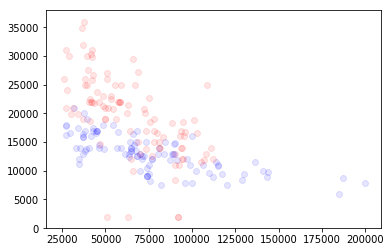

In [5]:
plt.scatter(list(map(miles,priuses)),list(map(price,priuses)),c='b',alpha=0.1)
plt.scatter(list(map(miles,bmws)),list(map(price,bmws)),c='r',alpha=0.1)

In [6]:
from math import exp
def sigmoid(x):
    return 1 / (1+exp(-x))

In [7]:
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

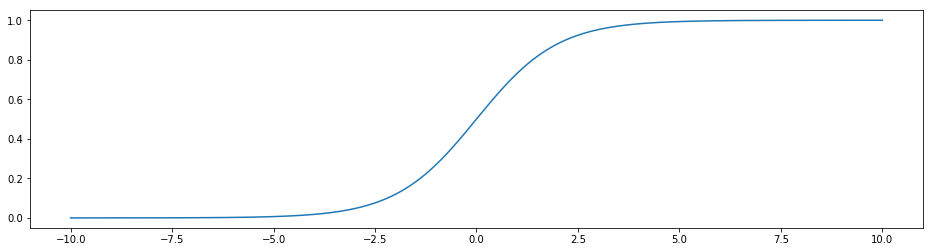

In [8]:
plot_function(sigmoid,-10,10)
plt.gcf().set_size_inches(16,4)

In [9]:
prius_raw_prices = [p[4] for p in priuses]
prius_raw_mileages = [p[3] for p in priuses]
bmw_raw_prices = [bmw[4] for bmw in bmws]
bmw_raw_mileages = [bmw[3] for bmw in bmws]

In [85]:
def make_scale(data):
    min_val = min(data)
    max_val = max(data)
    def scale(x):
        return (x-min_val) / (max_val - min_val)
    def unscale(y):
        return y * (max_val - min_val) + min_val
    return scale, unscale


In [11]:
price_scale, price_unscale = make_scale(prius_raw_prices + bmw_raw_prices)
mileage_scale, mileage_unscale = make_scale(prius_raw_mileages + bmw_raw_mileages)
prius_prices = [price_scale(price) for price in prius_raw_prices]
bmw_prices = [price_scale(price) for price in bmw_raw_prices]
prius_mileages = [mileage_scale(mileage) for mileage in prius_raw_mileages]
bmw_mileages = [mileage_scale(mileage) for mileage in bmw_raw_mileages]

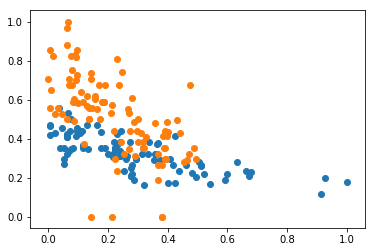

In [12]:
plt.scatter(prius_mileages,prius_prices)
plt.scatter(bmw_mileages,bmw_prices)

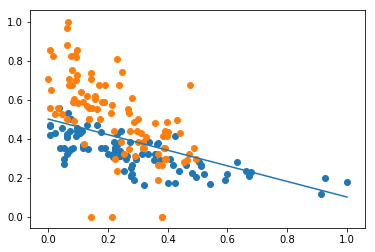

In [13]:
def guess_boundary(mileage):
    return 0.5 - 0.4* mileage

plt.scatter(prius_mileages,prius_prices)
plt.scatter(bmw_mileages,bmw_prices)
plot_function(guess_boundary,0,1)

In [14]:
def first_bmw_classifier(mileage,price):
    return price > guess_boundary(mileage)

## Testing how good it is

In [15]:
def test_bmw_classifier(classifier):
    true_pos = sum([1 for (mileage,price) 
                    in zip(bmw_mileages,bmw_prices)
                    if classifier(mileage,price)])
    true_neg = sum([1 for (mileage,price)
                    in zip(prius_mileages,prius_prices)
                    if not classifier(mileage,price)])
    return (true_pos + true_neg) / 200

In [16]:
test_bmw_classifier(first_bmw_classifier)

0.81

$$p(x) = 0.5 - 0.4 \cdot x$$

$$p + 0.4\cdot x = 0.5$$

In [17]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
def plot_scalar_field(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False, zorder=0):
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased, zorder=zorder)

In [18]:
def bmwness(mileage,price):
    return price + 0.4 * mileage - 0.5

<module 'matplotlib.pyplot' from 'C:\\Users\\Paul\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

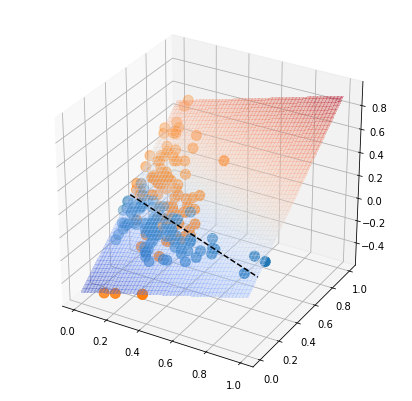

In [19]:

fig = plt.gcf()
ax = fig.gca(projection='3d')
plot_scalar_field(bmwness,0,1,0,1, alpha=0.3)
plt.gca().plot([0,1], [0.5,0.1], [0,0], c='k', linestyle='dashed',zorder=3)
prius_bmwness = [bmwness(m,p) for m,p in zip(prius_mileages, prius_prices)]
bmw_bmwness = [bmwness(m,p) for m,p in zip(bmw_mileages, bmw_prices)]

plt.gca().scatter(prius_mileages,prius_prices,prius_bmwness,zorder=5,s=100) 
plt.gca().scatter(bmw_mileages,bmw_prices,bmw_bmwness,zorder=5,s=100)
plt

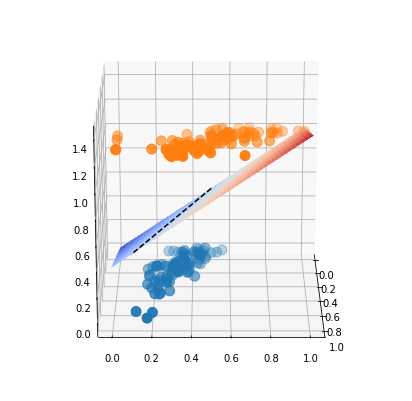

In [20]:
fig = plt.gcf()
ax = fig.gca(projection='3d')
plot_scalar_field(lambda m,p: bmwness(m,p)+0.5,0,1,0,1,zorder=-5, alpha=0.3)
plt.gca().plot([0,1], [0.5,0.1], [0.5,0.5], c='k', linestyle='dashed')
prius_bmwness = [0 for m,p in zip(prius_mileages, prius_prices)]
bmw_bmwness = [1 for m,p in zip(bmw_mileages, bmw_prices)]
ax.view_init(20, 0)
plt.gca().scatter(prius_mileages,prius_prices,prius_bmwness,zorder=20,s=100) 
plt.gca().scatter(bmw_mileages,bmw_prices,bmw_bmwness,zorder=21,s=100)

(0, 1)

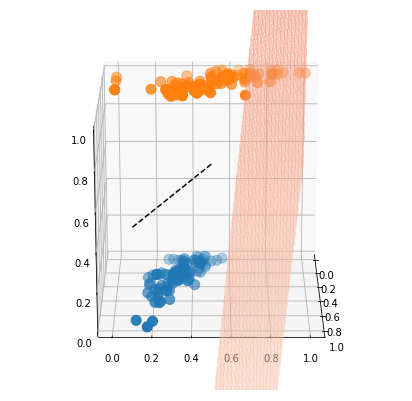

In [21]:
fig = plt.gcf()
ax = fig.gca(projection='3d')
plot_scalar_field(lambda m,p: 0.5 + 10* (bmwness(m,p)-0.5),0,1,0,1,zorder=-5, alpha=0.3)
plt.gca().plot([0,1], [0.5,0.1], [0.5,0.5], c='k', linestyle='dashed')
prius_bmwness = [0 for m,p in zip(prius_mileages, prius_prices)]
bmw_bmwness = [1 for m,p in zip(bmw_mileages, bmw_prices)]
ax.view_init(20, 0)
plt.gca().scatter(prius_mileages,prius_prices,prius_bmwness,zorder=20,s=100) 
plt.gca().scatter(bmw_mileages,bmw_prices,bmw_bmwness,zorder=21,s=100)
ax.set_zlim(0,1)

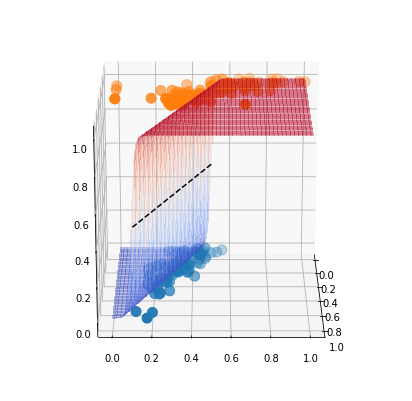

In [22]:
fig = plt.gcf()
ax = fig.gca(projection='3d')
plot_scalar_field(lambda m,p: sigmoid(100*(bmwness(m,p))),0,1,0,1,zorder=-5, alpha=0.3)
plt.gca().plot([0,1], [0.5,0.1], [0.5,0.5], c='k', linestyle='dashed')
prius_bmwness = [0 for m,p in zip(prius_mileages, prius_prices)]
bmw_bmwness = [1 for m,p in zip(bmw_mileages, bmw_prices)]
ax.view_init(20, 0)
plt.gca().scatter(prius_mileages,prius_prices,prius_bmwness,zorder=20,s=100) 
plt.gca().scatter(bmw_mileages,bmw_prices,bmw_bmwness,zorder=21,s=100)

In [23]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X,Y)
    
#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])

    fig.colorbar(c, ax=ax)

<Figure size 504x504 with 0 Axes>

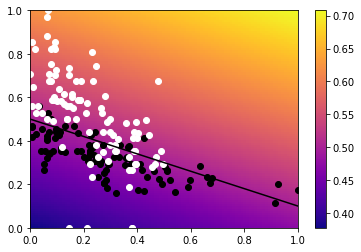

In [24]:
def test_logistic(m,p):
    return sigmoid(bmwness(m,p))

scalar_field_heatmap(test_logistic,0,1,0,1)
plt.scatter(prius_mileages,prius_prices,c='k')
plt.scatter(bmw_mileages,bmw_prices,c='w')
plot_function(guess_boundary,0,1,c='k')



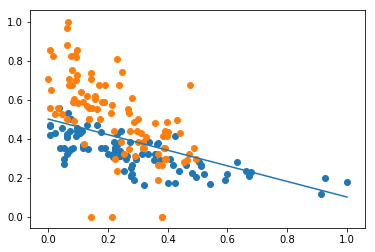

In [25]:
plt.scatter(prius_mileages,prius_prices)
plt.scatter(bmw_mileages,bmw_prices)
plot_function(guess_boundary,0,1)

In [26]:
from math import log

def point_cost(model,m,p,actual):
    if actual == 1:
        return -log(model(m,p))
    elif actual == 0:
        return -log(1 - model(m,p))
    else:
        raise ValueError("acual must be 0 or 1")
        
def make_logistic(a,b,c):
    def f(x,y):
        return sigmoid(a*x + b*y + c)
    return f

In [27]:
point_cost(test_logistic, 0.8, 0.8, 1)

0.430446744029496

In [28]:
data = [(m,p,1) for m,p in zip(bmw_mileages,bmw_prices)] +\
       [(m,p,0) for m,p in zip(prius_mileages,prius_prices)]

In [29]:
def cost(model,data):
    return sum(point_cost(model,m,p,cls) for m,p,cls in data)/len(data)

In [30]:
cost(test_logistic, data)

0.6549971417446429

In [31]:
cost(make_logistic(1,1,5),data)

2.80606990202087

<Figure size 504x504 with 0 Axes>

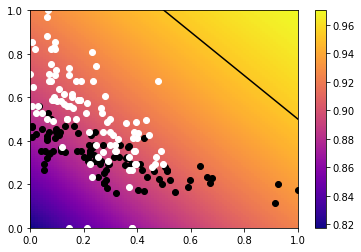

In [32]:
scalar_field_heatmap(make_logistic(1,1,1.5),0,1,0,1)
plt.scatter(prius_mileages,prius_prices,c='k')
plt.scatter(bmw_mileages,bmw_prices,c='w')


def plot_decision_boundary(a,b,c):
    if b != 0:
        plt.plot([0,1],[-c/b,-c/b - a / b],c='k')
    else:
        plt.plot([-a/c,-a/c],[0,1],c='k')
        
plot_decision_boundary(1,1,-1.5)

0.6778223415435228

<Figure size 504x504 with 0 Axes>

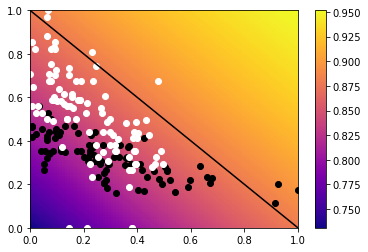

In [33]:

scalar_field_heatmap(make_logistic(1,1,1),0,1,0,1)
plt.scatter(prius_mileages,prius_prices,c='k')
plt.scatter(bmw_mileages,bmw_prices,c='w')
plot_decision_boundary(1,1,-1)
cost(make_logistic(1,1,-1),data)

0.869767992143058

<Figure size 504x504 with 0 Axes>

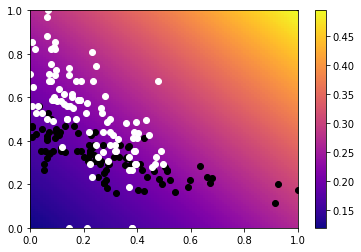

In [34]:
scalar_field_heatmap(make_logistic(1,1,-2),0,1,0,1)
plt.scatter(prius_mileages,prius_prices,c='k')
plt.scatter(bmw_mileages,bmw_prices,c='w')
plot_decision_boundary(1,1,-2)
cost(make_logistic(1,1,-2),data)

In [35]:
m,p = 0,0
make_logistic(1,1,1)(0,0)

0.7310585786300049

In [36]:
make_logistic(1,1,-1)(0.5,0.5)

0.5

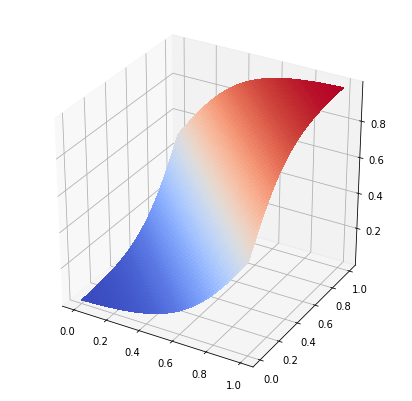

In [37]:
plot_scalar_field(make_logistic(5,5,-5),0,1,0,1)

In [38]:
from vectors import length 
def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

def approx_gradient3(f,x0,y0,z0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0,z0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y,z0),y0,dx=dx)
    partial_z = approx_derivative(lambda z:f(x0,y0,z),z0,dx=dx)
    return (partial_x,partial_y,partial_z)

def gradient_descent3(f,xstart,ystart,zstart,tolerance=1e-6,max_steps=1000):
    x = xstart
    y = ystart
    z = zstart
    grad = approx_gradient3(f,x,y,z)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        z -= 0.01 * grad[2]
        grad = approx_gradient3(f,x,y,z)
        print(grad)
        print("x,y,z=(%f,%f,%f), grad=(%f,%f,%f)" % ((x,y,z) + grad), f(x,y,z))
        steps += 1
    return x,y,z

In [39]:
def logistic_cost(a,b,c):
    return cost(make_logistic(a,b,c),data)
logistic_cost(1,1,0)
logistic_cost(2,0.8,-1)

0.6991595752870171

In [40]:
g = approx_gradient(logistic_cost,1,1,0)
g

NameError: name 'approx_gradient' is not defined

In [41]:
dx, dy, dz = g
logistic_cost(1,1,0), logistic_cost(1-dx,1-dy,0-dz)

NameError: name 'g' is not defined

In [42]:
res = gradient_descent3(logistic_cost,1,1,0)

(0.057374263172109655, 0.023706115236816754, 0.16002533159699364)
x,y,z=(0.999425,0.999761,-0.001604), grad=(0.057374,0.023706,0.160025) 0.7187225065911185
(0.05727110679977957, 0.023535794146257064, 0.15961503790904544)
x,y,z=(0.998851,0.999524,-0.003205), grad=(0.057271,0.023536,0.159615) 0.7184282656937923
(0.05716816003755654, 0.023365847145345515, 0.15920563206648472)
x,y,z=(0.998279,0.999289,-0.004801), grad=(0.057168,0.023366,0.159206) 0.7181355331353747
(0.05706542344055206, 0.02319627384550404, 0.15879711517949982)
x,y,z=(0.997707,0.999055,-0.006393), grad=(0.057065,0.023196,0.158797) 0.7178443015205788
(0.05696289545445389, 0.023027075245933372, 0.15838948591596047)
x,y,z=(0.997136,0.998823,-0.007981), grad=(0.056963,0.023027,0.158389) 0.7175545634789912
(0.05686057730050738, 0.022858250569477382, 0.15798274566337037)
x,y,z=(0.996567,0.998593,-0.009565), grad=(0.056861,0.022858,0.157983) 0.717266311669814
(0.05675846903422367, 0.022689799760624924, 0.15757689314511078)
x,y,z=

x,y,z=(0.897259,0.981960,-0.263471), grad=(0.039943,-0.004537,0.091652) 0.6804999542517592
(0.039880689860457626, -0.004635284156373423, 0.09141263185541756)
x,y,z=(0.896859,0.982005,-0.264388), grad=(0.039881,-0.004635,0.091413) 0.6803999132413242
(0.03981873380905905, -0.004732975899954153, 0.0911740457600865)
x,y,z=(0.896460,0.982052,-0.265302), grad=(0.039819,-0.004733,0.091174) 0.6803003501312471
(0.03975693907306595, -0.004830385313819728, 0.090936124244258)
x,y,z=(0.896062,0.982099,-0.266214), grad=(0.039757,-0.004830,0.090936) 0.6802012621943899
(0.039695306207589834, -0.004927512953081662, 0.09069886530953061)
x,y,z=(0.895665,0.982147,-0.267123), grad=(0.039695,-0.004928,0.090699) 0.6801026467185468
(0.039633834157918824, -0.005024360816141399, 0.09046226812323706)
x,y,z=(0.895268,0.982196,-0.268030), grad=(0.039634,-0.005024,0.090462) 0.6800045010062468
(0.03957252253547487, -0.005120927681753611, 0.09022633096453168)
x,y,z=(0.894871,0.982247,-0.268935), grad=(0.039573,-0.005

x,y,z=(0.834898,1.002926,-0.393905), grad=(0.031163,-0.018030,0.058366) 0.6682544757503579
(0.031124045340107223, -0.018087163990254944, 0.05822257259802468)
x,y,z=(0.834587,1.003106,-0.394489), grad=(0.031124,-0.018087,0.058223) 0.6682074906027897
(0.031085482909082154, -0.01814427075402189, 0.05807950887048959)
x,y,z=(0.834276,1.003287,-0.395071), grad=(0.031085,-0.018144,0.058080) 0.6681606758899588
(0.03104702472799909, -0.018201198105748044, 0.05793686808241575)
x,y,z=(0.833965,1.003469,-0.395652), grad=(0.031047,-0.018201,0.057937) 0.6681140306133594
(0.031008670186235376, -0.018257945601344194, 0.05779464929011358)
x,y,z=(0.833654,1.003651,-0.396231), grad=(0.031009,-0.018258,0.057795) 0.6680675537806319
(0.03097041989441367, -0.01831451424001106, 0.057652851272337755)
x,y,z=(0.833344,1.003833,-0.396809), grad=(0.030970,-0.018315,0.057653) 0.6680212444053777
(0.0309322727978221, -0.018370904576860157, 0.05751147291886525)
x,y,z=(0.833034,1.004016,-0.397386), grad=(0.030932,-0.01

(0.025956157777926276, -0.025443593123381347, 0.03946683896466476)
x,y,z=(0.787502,1.039746,-0.474380), grad=(0.025956,-0.025444,0.039467) 0.6621629950511658
(0.025931456703407855, -0.025476867950722033, 0.039379815520655975)
x,y,z=(0.787243,1.040001,-0.474775), grad=(0.025931,-0.025477,0.039380) 0.6621342238969575
(0.02590682074346983, -0.02551003158922679, 0.03929305375621409)
x,y,z=(0.786983,1.040256,-0.475169), grad=(0.025907,-0.025510,0.039293) 0.6621055171386203
(0.02588225006464565, -0.025543083816851022, 0.039206554281961785)
x,y,z=(0.786724,1.040511,-0.475562), grad=(0.025882,-0.025543,0.039207) 0.6620768744081263
(0.02585774361222344, -0.02557602496666163, 0.039120314710919556)
x,y,z=(0.786465,1.040766,-0.475954), grad=(0.025858,-0.025576,0.039120) 0.6620482953391696
(0.02583330194131472, -0.025608855982348185, 0.03903433554268775)
x,y,z=(0.786207,1.041022,-0.476345), grad=(0.025833,-0.025609,0.039034) 0.6620197795685031
(0.025808924385785668, -0.02564157691942184, 0.03894861

(0.020936685051717554, -0.031474471087569435, 0.022783111729884786)
x,y,z=(0.721269,1.122552,-0.560082), grad=(0.020937,-0.031474,0.022783) 0.6555856084410057
(0.020924563914290803, -0.03148635458175909, 0.022746471427982192)
x,y,z=(0.721060,1.122867,-0.560310), grad=(0.020925,-0.031486,0.022746) 0.6555661314407264
(0.02091247086550657, -0.031498191779648625, 0.02270994214838206)
x,y,z=(0.720851,1.123182,-0.560537), grad=(0.020912,-0.031498,0.022710) 0.6555466686982583
(0.02090040568332026, -0.03150998184857075, 0.02267352266983906)
x,y,z=(0.720641,1.123497,-0.560765), grad=(0.020900,-0.031510,0.022674) 0.6555272201484124
(0.020888368090176107, -0.031521725843237355, 0.0226372133254201)
x,y,z=(0.720432,1.123812,-0.560991), grad=(0.020888,-0.031522,0.022637) 0.6555077857269304
(0.020876357753007207, -0.031533423264048066, 0.022601013337969062)
x,y,z=(0.720224,1.124127,-0.561218), grad=(0.020876,-0.031533,0.022601) 0.6554883653695437
(0.020864375004880472, -0.03154507488815901, 0.0225649

In [43]:
0.2715312735590776 0.4836297528833531,-2.2921631741281945

SyntaxError: invalid syntax (<ipython-input-43-7802c50009cf>, line 1)

In [ ]:
plt.scatter(prius_mileages,prius_prices,c='k')
plt.scatter(bmw_mileages,bmw_prices,c='w')
plot_decision_boundary(*res)
logistic_cost(1,0.4,-0.5)

In [ ]:
logistic_cost(1.29,1.5,.24)

In [44]:
point_cost(make_logistic(1.29,1.5,.24),0.5,0.5,0)

1.8131063279357729

In [45]:
sum(point_cost(make_logistic(1.29,1.5,.24),m,p,0) for m,p,cls in data if cls==0)/100

1.3825941440218927

In [46]:
sum(point_cost(make_logistic(1.29,1.5,.24),m,p,1) for m,p,cls in data if cls==1)/100

0.24677527317292294

In [47]:
logistic_cost(0.27,0.48,-3.29)

1.5394950205620888

In [48]:
logistic_cost(1,0.4,-0.5)

0.6926648887724869

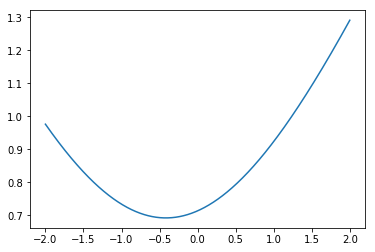

In [49]:
plot_function(lambda c: logistic_cost(1,0.4,c),-2,2)

<Figure size 504x504 with 0 Axes>

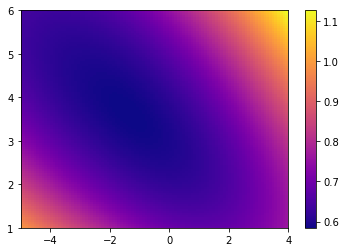

In [50]:
scalar_field_heatmap(lambda a,b: logistic_cost(a,b,-1),-5,4,1,6)

In [51]:
np.arange(-5,5,0.1)

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [52]:
costs = [(logistic_cost(a,b,c),a,b,c) for a in np.arange(-1,1,0.1) for b in np.arange(-1,1,0.1) for c in np.arange(-1,1,0.1)]
min(costs,key=lambda x:x[0])


(0.6473064723039278, -1.0, 0.8999999999999995, -0.1000000000000002)

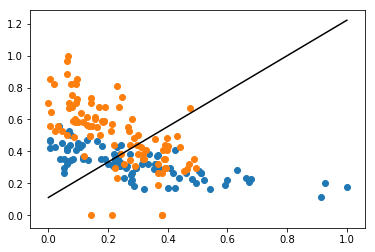

In [67]:

plot_decision_boundary(-1,0.9,-0.1)
logistic_cost(-1,0.9,-0.1),logistic_cost(1,0.4,-0.5)
bmw_data = [d for d in data if d[2]==1]
prius_data = [d for d in data if d[2]==0]
cost(make_logistic(-1,0.9,-0.1),bmw_data)
cost(make_logistic(-1,0.9,-0.1),prius_data)
plt.scatter(prius_mileages,prius_prices)
plt.scatter(bmw_mileages,bmw_prices)




In [54]:
def logistic_classify(m,p):
    return make_logistic(-1,0.9,-0.1)(m,p) > 0.5

test_bmw_classifier(logistic_classify)

0.615

In [70]:
def approx_gradient2(f,x0,y0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y),y0,dx=dx)
    return (partial_x,partial_y)
    
def gradient_descent2(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient2(f,x,y)
    while length(grad) > tolerance:
        x -= 0.1 * grad[0]
        y -= 0.1 * grad[1]
        grad = approx_gradient2(f,x,y)
    return x,y

In [71]:
gradient_descent2(lambda a,b: logistic_cost(a,b,-1),0,5)

(-1.4137803064565895, 3.6405476043686096)

(0.5842753820974455, 0.7335130293257831)

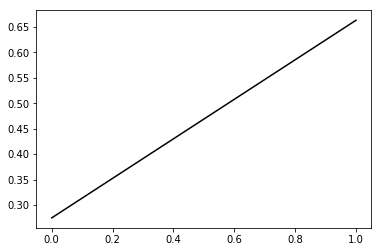

In [72]:
plot_decision_boundary(-1.413, 3.64, -1)
logistic_cost(-1.413,3.64,-1), logistic_cost(1,0.4,-1)


In [73]:
from random import random
random()

0.7614121324459793

In [113]:
fake_data = []

for i in range(0,50):
    x = random()
    y = random()
    fake_data.append((x,y,x + y > 1))
    
def plot_data(ds):
    plt.scatter([d[0] for d in ds if d[2]==1],[d[1] for d in ds if d[2]==1])
    plt.scatter([d[0] for d in ds if d[2]==0],[d[1] for d in ds if d[2]==0])

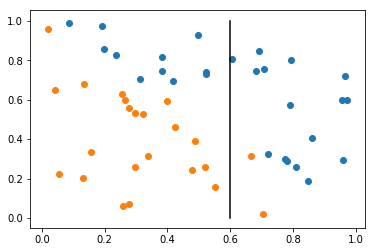

In [114]:
plot_data(fake_data)


In [115]:
cost(make_logistic(1,1,-3.0), fake_data)

1.0711215294859509

In [77]:
def fake_logistic_cost(a,b,c):
    return cost(make_logistic(a,b,c), fake_data)

In [78]:
gradient_descent3(fake_logistic_cost,1,1,0)

(0.10210453393594877, 0.08811686907663507, 0.3334089781481088)
x,y,z=(0.998975,0.999115,-0.003342), grad=(0.102105,0.088117,0.333409) 0.7719248516634187
(0.10172182812447397, 0.08774255105562223, 0.3325819823984502)
x,y,z=(0.997954,0.998234,-0.006676), grad=(0.101722,0.087743,0.332582) 0.7706330754086682
(0.10133938732323514, 0.08736849049532878, 0.33175581232194273)
x,y,z=(0.996937,0.997356,-0.010002), grad=(0.101339,0.087368,0.331756) 0.7693482387321622
(0.10095721830459273, 0.08699469427913749, 0.33093048079659737)
x,y,z=(0.995923,0.996483,-0.013320), grad=(0.100957,0.086995,0.330930) 0.7680703157436781
(0.10057532761886258, 0.0866211689573642, 0.3301060008117392)
x,y,z=(0.994914,0.995613,-0.016629), grad=(0.100575,0.086621,0.330106) 0.7667992804953657
(0.10019372159431594, 0.08624792080276901, 0.32928238502505747)
x,y,z=(0.993908,0.994747,-0.019930), grad=(0.100194,0.086248,0.329282) 0.7655351069834865
(0.09981240744740247, 0.08587495669873466, 0.3284596465921209)
x,y,z=(0.992906,0

x,y,z=(0.834196,0.890947,-0.886196), grad=(-0.006940,-0.018269,0.104050) 0.5629634396796288
(-0.007045941940805883, -0.018370511056269512, 0.10382730053194543)
x,y,z=(0.834266,0.891130,-0.887237), grad=(-0.007046,-0.018371,0.103827) 0.5628514590354128
(-0.0071510958819129625, -0.01847203268070703, 0.10360513524578402)
x,y,z=(0.834336,0.891314,-0.888275), grad=(-0.007151,-0.018472,0.103605) 0.5627398890477814
(-0.007255858025314662, -0.01857316889122156, 0.10338375688570242)
x,y,z=(0.834408,0.891498,-0.889311), grad=(-0.007256,-0.018573,0.103384) 0.5626287268594845
(-0.007360229592256311, -0.01867392096456958, 0.10316316289818771)
x,y,z=(0.834480,0.891684,-0.890345), grad=(-0.007360,-0.018674,0.103163) 0.5625179696339656
(-0.007464211915005538, -0.018774290066485268, 0.10294335050768232)
x,y,z=(0.834554,0.891871,-0.891376), grad=(-0.007464,-0.018774,0.102943) 0.5624076145547
(-0.007567806492363424, -0.0188742775847474, 0.10272431677209522)
x,y,z=(0.834629,0.892058,-0.892406), grad=(-0.0

x,y,z=(0.899155,0.992640,-1.150370), grad=(-0.027019,-0.037367,0.059792) 0.537412463113741
(-0.027046645033945126, -0.03739206355549864, 0.059723611838730616)
x,y,z=(0.899425,0.993013,-1.150968), grad=(-0.027047,-0.037392,0.059724) 0.5373554616234234
(-0.027074359808863805, -0.03741741311128572, 0.059655682121318374)
x,y,z=(0.899695,0.993387,-1.151565), grad=(-0.027074,-0.037417,0.059656) 0.5372985074489413
(-0.02710195945365483, -0.03744264992392466, 0.059587980110648496)
x,y,z=(0.899966,0.993761,-1.152162), grad=(-0.027102,-0.037443,0.059588) 0.5372416003437079
(-0.02712944452342972, -0.03746777399341545, 0.05952050536263178)
x,y,z=(0.900237,0.994136,-1.152758), grad=(-0.027129,-0.037468,0.059521) 0.5371847400630647
(-0.027156815628811132, -0.0374927857638473, 0.059453256933578655)
x,y,z=(0.900508,0.994511,-1.153353), grad=(-0.027157,-0.037493,0.059453) 0.5371279263639754
(-0.02718407271428792, -0.037517685790331726, 0.0593862338242884)
x,y,z=(0.900780,0.994885,-1.153947), grad=(-0.0

(0.9589916372683256, 1.0732190277212443, -1.2614099111149124)

In [79]:
approx_gradient3(fake_logistic_cost,1,1,1)

(0.16960486660010082, 0.15396528941081838, 0.4889499336655315)

In [80]:
fake_logistic_cost(0.11,0.15,0.41)

0.7716221292119101

In [81]:
fake_logistic_cost(1,1,-1)

0.5483979368738692

<Figure size 504x504 with 0 Axes>

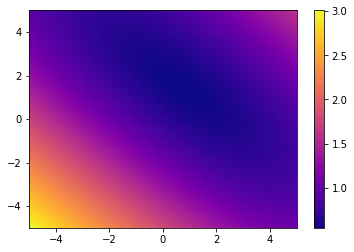

In [82]:
scalar_field_heatmap(lambda a,b:fake_logistic_cost(a,b,-1),-5,5,-5,5)

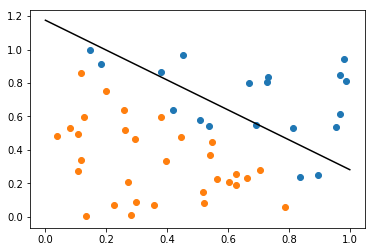

In [84]:
plot_decision_boundary(0.9589916372683256, 1.0732190277212443, -1.2614099111149124)
plot_data(fake_data)

In [94]:
# new_priuses = [car for yr in range(2013,2021) for car in get_cars("toyota","prius",yr) if price(car)<40000 and miles(car)>25000]

In [95]:
new_priuses = [('toyota', 'prius', 2013.0, 59014.0, 13995.0, 70.0547685542824),
 ('toyota', 'prius', 2013.0, 84507.0, 14998.0, 70.1394907880787),
 ('toyota', 'prius', 2013.0, 75000.0, 13000.0, 0.31657412141203706),
 ('toyota', 'prius', 2013.0, 41868.0, 15998.0, 70.13949079965278),
 ('toyota', 'prius', 2013.0, 40631.0, 13991.0, 70.05685191076388),
 ('toyota', 'prius', 2013.0, 69703.0, 12900.0, 70.10060192231481),
 ('toyota', 'prius', 2013.0, 76000.0, 12000.0, 1.3318519223148149),
 ('toyota', 'prius', 2013.0, 74000.0, 10532.0, 193.1110185889815),
 ('toyota', 'prius', 2013.0, 33000.0, 13995.0, 70.05893526722222),
 ('toyota', 'prius', 2013.0, 97109.0, 11991.0, 70.01865748944445),
 ('toyota', 'prius', 2013.0, 35000.0, 11100.0, 115.90824083440972),
 ('toyota', 'prius', 2013.0, 128882.0, 8359.0, 70.01935194552084),
 ('toyota', 'prius', 2013.0, 39000.0, 13759.0, 70.02074083440972),
 ('toyota', 'prius', 2013.0, 88000.0, 10999.0, 3.1908797348611113),
 ('toyota', 'prius', 2013.0, 115000.0, 9495.0, 3.0776852904166665),
 ('toyota', 'prius', 2013.0, 37000.0, 12950.0, 70.02490752421296),
 ('toyota', 'prius', 2013.0, 115000.0, 9495.0, 3.078379746435185),
 ('toyota', 'prius', 2013.0, 63430.0, 12995.0, 70.15476864689815),
 ('toyota', 'prius', 2013.0, 46000.0, 13982.0, 70.15754643605324),
 ('toyota', 'prius', 2013.0, 73428.0, 14991.0, 70.03532421383102),
 ('toyota', 'prius', 2013.0, 200000.0, 4700.0, 4.60268533650463),
 ('toyota', 'prius', 2013.0, 88180.0, 12998.0, 71.01032423696759),
 ('toyota', 'prius', 2013.0, 178620.0, 7995.0, 5.390185348078703),
 ('toyota', 'prius', 2013.0, 89466.0, 14599.0, 71.05199090363426),
 ('toyota', 'prius', 2013.0, 88000.0, 10999.0, 5.449213125856481),
 ('toyota', 'prius', 2013.0, 76985.0, 11990.0, 71.01032423696759),
 ('toyota', 'prius', 2013.0, 63621.0, 12395.0, 71.05268535965278),
 ('toyota', 'prius', 2013.0, 89000.0, 8995.0, 5.499907581875),
 ('toyota', 'prius', 2013.0, 89000.0, 8995.0, 5.500602037905092),
 ('toyota', 'prius', 2013.0, 300000.0, 12000.0, 6.491574271689815),
 ('toyota', 'prius', 2013.0, 300000.0, 12000.0, 6.49712982724537),
 ('toyota', 'prius', 2013.0, 118000.0, 8100.0, 7.432546493912037),
 ('toyota', 'prius', 2013.0, 88000.0, 10999.0, 7.557546505659722),
 ('toyota', 'prius', 2013.0, 149000.0, 7150.0, 9.737407616770833),
 ('toyota', 'prius', 2013.0, 115000.0, 9495.0, 11.03949097306713),
 ('toyota', 'prius', 2013.0, 115000.0, 9495.0, 11.042963195289351),
 ('toyota', 'prius', 2013.0, 117602.0, 9495.0, 11.431157639733796),
 ('toyota', 'prius', 2014.0, 80424.0, 13000.0, 70.05477077636574),
 ('toyota', 'prius', 2014.0, 48655.0, 17998.0, 70.01449299858797),
 ('toyota', 'prius', 2014.0, 102000.0, 9997.0, 107.30893745460648),
 ('toyota', 'prius', 2014.0, 67508.0, 14991.0, 70.14227078793982),
 ('toyota', 'prius', 2014.0, 39395.0, 18998.0, 70.14227079950231),
 ('toyota', 'prius', 2014.0, 130000.0, 10995.0, 2.62907635505787),
 ('toyota', 'prius', 2014.0, 44531.0, 16577.0, 70.01935413283564),
 ('toyota', 'prius', 2014.0, 42000.0, 15999.0, 3.0839374777430555),
 ('toyota', 'prius', 2014.0, 35000.0, 11999.0, 70.02004858885417),
 ('toyota', 'prius', 2014.0, 66293.0, 14472.0, 70.0242152670949),
 ('toyota', 'prius', 2014.0, 109496.0, 9677.0, 70.0256041559838),
 ('toyota', 'prius', 2014.0, 106361.0, 10953.0, 70.07004861200231),
 ('toyota', 'prius', 2014.0, 42000.0, 15999.0, 5.449215290231481),
 ('toyota', 'prius', 2014.0, 76912.0, 11993.0, 70.03463195689815),
 ('toyota', 'prius', 2014.0, 89000.0, 10000.0, 5.545743068009259),
 ('toyota', 'prius', 2014.0, 113963.0, 11494.0, 70.08115973467592),
 ('toyota', 'prius', 2014.0, 119000.0, 12900.0, 5.475604179120371),
 ('toyota', 'prius', 2014.0, 71218.0, 11994.0, 70.04018752402777),
 ('toyota', 'prius', 2014.0, 72000.0, 11990.0, 5.622131968472222),
 ('toyota', 'prius', 2014.0, 42000.0, 15999.0, 7.630465301805556),
 ('toyota', 'prius', 2014.0, 48924.0, 13786.0, 71.01032641291667),
 ('toyota', 'prius', 2014.0, 113000.0, 8942.0, 7.577687535590278),
 ('toyota', 'prius', 2014.0, 98531.0, 10979.0, 71.01032642447916),
 ('toyota', 'prius', 2014.0, 43015.0, 16977.0, 71.0561597578125),
 ('toyota', 'prius', 2014.0, 29695.0, 16599.0, 71.06171532494213),
 ('toyota', 'prius', 2014.0, 44640.0, 16900.0, 71.06240976938658),
 ('toyota', 'prius', 2014.0, 42000.0, 15999.0, 11.256159769386574),
 ('toyota', 'prius', 2014.0, 56478.0, 13990.0, 71.10407643605325),
 ('toyota', 'prius', 2014.0, 114959.0, 11060.0, 71.02143755873843),
 ('toyota', 'prius', 2014.0, 99000.0, 10500.0, 11.39852089207176),
 ('toyota', 'prius', 2014.0, 83861.0, 13000.0, 71.02143755873843),
 ('toyota', 'prius', 2014.0, 72000.0, 12100.0, 11.685326447627315),
 ('toyota', 'prius', 2014.0, 143000.0, 8200.0, 14.51032647076389),
 ('toyota', 'prius', 2014.0, 57000.0, 13300.0, 15.356159804097222),
 ('toyota', 'prius', 2014.0, 74000.0, 13500.0, 16.162409815671296),
 ('toyota', 'prius', 2014.0, 42000.0, 15999.0, 16.651298704560187),
 ('toyota', 'prius', 2014.0, 117000.0, 8999.0, 16.638798704560184),
 ('toyota', 'prius', 2014.0, 143000.0, 8500.0, 22.104076505474538),
 ('toyota', 'prius', 2015.0, 91314.0, 11911.0, 70.05477313778935),
 ('toyota', 'prius', 2015.0, 113000.0, 12500.0, 0.29991203824074075),
 ('toyota', 'prius', 2015.0, 46000.0, 14500.0, 122.76866203824073),
 ('toyota', 'prius', 2015.0, 45358.0, 16991.0, 70.0554675937963),
 ('toyota', 'prius', 2015.0, 68432.0, 16998.0, 70.13949538315973),
 ('toyota', 'prius', 2015.0, 37739.0, 19998.0, 70.05616206138889),
 ('toyota', 'prius', 2015.0, 89352.0, 12995.0, 70.01449539472222),
 ('toyota', 'prius', 2015.0, 61000.0, 13000.0, 136.27907873962963),
 ('toyota', 'prius', 2015.0, 35385.0, 13988.0, 70.01657873962964),
 ('toyota', 'prius', 2015.0, 113000.0, 12500.0, 1.3603287396296295),
 ('toyota', 'prius', 2015.0, 57000.0, 16791.0, 70.01657875120371),
 ('toyota', 'prius', 2015.0, 90019.0, 14790.0, 70.01727319564814),
 ('toyota', 'prius', 2015.0, 136095.0, 11595.0, 70.14435652898148),
 ('toyota', 'prius', 2015.0, 27000.0, 16235.0, 70.14574542943286),
 ('toyota', 'prius', 2015.0, 75000.0, 11600.0, 2.4381065405439815),
 ('toyota', 'prius', 2015.0, 54480.0, 17910.0, 70.02143987387731),
 ('toyota', 'prius', 2015.0, 73000.0, 2015.0, 2.493662096099537),
 ('toyota', 'prius', 2015.0, 100000.0, 16000.0, 70.14991210767361),
 ('toyota', 'prius', 2015.0, 36000.0, 15500.0, 3.4054676632291665),
 ('toyota', 'prius', 2015.0, 65899.0, 16482.0, 70.02560655211805),
 ('toyota', 'prius', 2015.0, 27000.0, 17734.0, 70.06796767479166),
 ('toyota', 'prius', 2015.0, 26989.0, 17925.0, 70.15268989701389),
 ('toyota', 'prius', 2015.0, 35000.0, 15500.0, 4.326301008125),
 ('toyota', 'prius', 2015.0, 67662.0, 13400.0, 70.02977324192129),
 ('toyota', 'prius', 2015.0, 75000.0, 13500.0, 4.4422732419212965),
 ('toyota', 'prius', 2015.0, 38401.0, 16998.0, 70.15477324192129),
 ('toyota', 'prius', 2015.0, 80982.0, 13999.0, 70.15685657525464),
 ('toyota', 'prius', 2015.0, 51000.0, 14900.0, 4.676301031273148),
 ('toyota', 'prius', 2015.0, 43000.0, 17492.0, 70.11866214238425),
 ('toyota', 'prius', 2015.0, 61000.0, 13500.0, 5.595051031273148),
 ('toyota', 'prius', 2015.0, 87428.0, 11794.0, 70.03880104284723),
 ('toyota', 'prius', 2015.0, 34028.0, 17491.0, 70.16518993173611),
 ('toyota', 'prius', 2015.0, 75000.0, 13500.0, 11.585328866898148),
 ('toyota', 'prius', 2015.0, 50000.0, 11500.0, 12.23671776736111),
 ('toyota', 'prius', 2015.0, 73000.0, 10995.0, 12.495051100694445),
 ('toyota', 'prius', 2015.0, 73000.0, 10995.0, 12.373523322916666),
 ('toyota', 'prius', 2015.0, 70000.0, 12000.0, 12.454078878472222),
 ('toyota', 'prius', 2016.0, 54000.0, 16986.0, 71.65685921157407),
 ('toyota', 'prius', 2016.0, 53759.0, 17995.0, 70.01380366777778),
 ('toyota', 'prius', 2016.0, 26796.0, 20998.0, 70.05547034601852),
 ('toyota', 'prius', 2016.0, 47015.0, 21887.0, 70.13880367935185),
 ('toyota', 'prius', 2016.0, 100000.0, 20491.0, 70.01380369091436),
 ('toyota', 'prius', 2016.0, 70090.0, 19998.0, 70.13880369091436),
 ('toyota', 'prius', 2016.0, 49249.0, 20990.0, 70.09713703582176),
 ('toyota', 'prius', 2016.0, 40080.0, 18998.0, 70.13880370248843),
 ('toyota', 'prius', 2016.0, 25764.0, 18998.0, 70.09783148026621),
 ('toyota', 'prius', 2016.0, 53396.0, 17147.0, 70.13949815831019),
 ('toyota', 'prius', 2016.0, 108531.0, 14988.0, 70.13949817008101),
 ('toyota', 'prius', 2016.0, 31000.0, 20981.0, 70.13949817008101),
 ('toyota', 'prius', 2016.0, 40000.0, 16000.0, 4.217275959224537),
 ('toyota', 'prius', 2016.0, 100000.0, 17700.0, 70.01519263746528),
 ('toyota', 'prius', 2016.0, 59424.0, 19490.0, 70.14019263746528),
 ('toyota', 'prius', 2016.0, 85000.0, 19115.0, 5.569359304131944),
 ('toyota', 'prius', 2016.0, 48000.0, 19998.0, 70.01658152635417),
 ('toyota', 'prius', 2016.0, 44548.0, 19688.0, 70.14297042695601),
 ('toyota', 'prius', 2016.0, 64896.0, 18886.0, 70.01866488296297),
 ('toyota', 'prius', 2017.0, 100000.0, 21990.0, 70.05686168628472),
 ('toyota', 'prius', 2017.0, 27407.0, 20991.0, 70.05825058668981),
 ('toyota', 'prius', 2017.0, 100000.0, 19991.0, 70.14227837604167),
 ('toyota', 'prius', 2017.0, 28189.0, 20495.0, 70.14297283204861),
 ('toyota', 'prius', 2017.0, 53581.0, 18274.0, 70.01936173256945),
 ('toyota', 'prius', 2017.0, 38163.0, 19887.0, 70.10408396630787),
 ('toyota', 'prius', 2017.0, 83501.0, 16311.0, 70.10547286677084),
 ('toyota', 'prius', 2017.0, 100000.0, 24995.0, 70.0256117672338),
 ('toyota', 'prius', 2017.0, 33520.0, 19999.0, 70.15200066768519),
 ('toyota', 'prius', 2017.0, 41572.0, 19500.0, 70.15338955657407),
 ('toyota', 'prius', 2017.0, 78000.0, 13647.0, 9.599917334351852),
 ('toyota', 'prius', 2017.0, 94447.0, 12995.0, 70.07213956814815),
 ('toyota', 'prius', 2018.0, 27000.0, 22900.0, 70.01311413833334),
 ('toyota', 'prius', 2018.0, 30610.0, 21097.0, 70.01380859445602),
 ('toyota', 'prius', 2018.0, 32000.0, 19950.0, 70.13950305037037),
 ('toyota', 'prius', 2018.0, 27236.0, 23743.0, 70.0575586175),
 ('toyota', 'prius', 2018.0, 36271.0, 20445.0, 70.02075307350694),
 ('toyota', 'prius', 2018.0, 100000.0, 25206.0, 70.02144751795139),
 ('toyota', 'prius', 2018.0, 33540.0, 18950.0, 70.02769754109954),
 ('toyota', 'prius', 2018.0, 50186.0, 18477.0, 70.02978087443287),
 ('toyota', 'prius', 2018.0, 100000.0, 23999.0, 70.07283644155092),
 ('toyota', 'prius', 2018.0, 48000.0, 17999.0, 24.331864219328704),
 ('toyota', 'prius', 2018.0, 54513.0, 17582.0, 70.16936423090277),
 ('toyota', 'prius', 2018.0, 36638.0, 19177.0, 70.04575313136574),
 ('toyota', 'prius', 2018.0, 31971.0, 17996.0, 70.04575313136574),
 ('toyota', 'prius', 2018.0, 29000.0, 23500.0, 61.48255875634259),
 ('toyota', 'prius', 2019.0, 100000.0, 27600.0, 70.02422730320602),
 ('toyota', 'prius', 2019.0, 100000.0, 23388.0, 72.13881071752314),
 ('toyota', 'prius', 2019.0, 100000.0, 24989.0, 72.15408851844907),
 ('toyota', 'prius', 2019.0, 100000.0, 27488.0, 73.14367189805556),
 ('toyota', 'prius', 2019.0, 100000.0, 26804.0, 73.02214412027777),
 ('toyota', 'prius', 2011.0, 89929.0, 12495.0, 70.05478553975695),
 ('toyota', 'prius', 2011.0, 206000.0, 5500.0, -0.557020004224537),
 ('toyota', 'prius', 2018.0, 27000.0, 22900.0, 70.01311889625),
 ('toyota', 'prius', 2014.0, 80424.0, 13000.0, 70.05478558604166),
 ('toyota', 'prius', 2013.0, 59014.0, 13995.0, 70.05478559761573),
 ('toyota', 'prius', 2007.0, 138001.0, 5900.0, 70.09645227585648),
 ('toyota', 'prius', 2009.0, 228000.0, 3600.0, -0.6334088235879629),
 ('toyota', 'prius', 2015.0, 91314.0, 11911.0, 70.05478562085648),
 ('toyota', 'prius', 2007.0, 209395.0, 2200.0, 70.09645231061343),
 ('toyota', 'prius', 2007.0, 201452.0, 3995.0, 70.01311898880788),
 ('toyota', 'prius', 2016.0, 53759.0, 17995.0, 70.01381344482638),
 ('toyota', 'prius', 2016.0, 26796.0, 20998.0, 70.05548012305556),
 ('toyota', 'prius', 2016.0, 47015.0, 21887.0, 70.13881346796296),
 ('toyota', 'prius', 2016.0, 100000.0, 20491.0, 70.01381347953703),
 ('toyota', 'prius', 2007.0, 159000.0, 4500.0, -0.5125754093518519),
 ('toyota', 'prius', 2016.0, 70090.0, 19998.0, 70.13881349112269),
 ('toyota', 'prius', 2016.0, 49249.0, 20990.0, 70.09714683600694),
 ('toyota', 'prius', 2009.0, 109996.0, 10598.0, 70.01381350267361),
 ('toyota', 'prius', 2010.0, 125247.0, 10599.0, 70.05548018090278),
 ('toyota', 'prius', 2018.0, 30610.0, 21097.0, 70.01381352581018),
 ('toyota', 'prius', 2015.0, 45358.0, 16991.0, 70.05548019247685),
 ('toyota', 'prius', 2016.0, 40080.0, 18998.0, 70.13881353739583),
 ('toyota', 'prius', 2011.0, 103692.0, 10998.0, 70.01450798184028),
 ('toyota', 'prius', 2010.0, 165000.0, 6700.0, -0.40771422883101854),
 ('toyota', 'prius', 2011.0, 123000.0, 7495.0, -0.3854920066087963),
 ('toyota', 'prius', 2008.0, 104000.0, 4200.0, -0.3854919950347222),
 ('toyota', 'prius', 2006.0, 144000.0, 4500.0, -0.3216031061458333),
 ('toyota', 'prius', 2012.0, 41000.0, 10000.0, -0.20076973811342594),
 ('toyota', 'prius', 2010.0, 154000.0, 6200.0, 0.1846469401273148),
 ('toyota', 'prius', 2013.0, 75000.0, 13000.0, 0.3165913845717593)]

In [99]:
# bmws = [car for yr in range(2013,2021) for car in get_cars("bmw","5",yr) if price(car) and miles(car)>25000]

In [100]:
new_bmws = [('bmw', '5', 2013.0, 93404.0, 13999.0, 70.01385304342593),
 ('bmw', '5', 2013.0, 110890.0, 13995.0, 70.13885304342593),
 ('bmw', '5', 2013.0, 94133.0, 13982.0, 70.01385304342593),
 ('bmw', '5', 2013.0, 46778.0, 14599.0, 70.13954748787037),
 ('bmw', '5', 2013.0, 53106.0, 22500.0, 70.01454748787037),
 ('bmw', '5', 2013.0, 58761.0, 24998.0, 70.01454748787037),
 ('bmw', '5', 2013.0, 108816.0, 24947.0, 70.05621415453703),
 ('bmw', '5', 2013.0, 81100.0, 13995.0, 70.01524193231481),
 ('bmw', '5', 2013.0, 68613.0, 14995.0, 70.05690859898148),
 ('bmw', '5', 2013.0, 92500.0, 10995.0, 70.01524193231481),
 ('bmw', '5', 2013.0, 112081.0, 11995.0, 70.14024193231481),
 ('bmw', '5', 2013.0, 109000.0, 13995.0, 2.4166308212037038),
 ('bmw', '5', 2013.0, 105121.0, 11500.0, 70.01524193231481),
 ('bmw', '5', 2013.0, 92000.0, 13988.0, 2.670103043425926),
 ('bmw', '5', 2013.0, 107953.0, 12999.0, 70.01732526564815),
 ('bmw', '5', 2013.0, 101191.0, 18900.0, 70.01801971009259),
 ('bmw', '5', 2013.0, 64365.0, 16998.0, 70.14371415453704),
 ('bmw', '5', 2013.0, 76675.0, 12500.0, 70.06246415453704),
 ('bmw', '5', 2013.0, 93015.0, 15995.0, 70.14718637675927),
 ('bmw', '5', 2013.0, 80917.0, 14970.0, 70.02496415453703),
 ('bmw', '5', 2013.0, 96000.0, 16795.0, 70.02635304342593),
 ('bmw', '5', 2013.0, 113000.0, 14800.0, 5.011075446631945),
 ('bmw', '5', 2013.0, 93000.0, 2013.0, 4.996492113298611),
 ('bmw', '5', 2013.0, 107000.0, 11580.0, 6.019408779965278),
 ('bmw', '5', 2013.0, 107000.0, 11580.0, 6.021492113298611),
 ('bmw', '5', 2014.0, 57624.0, 21963.0, 70.01455377121528),
 ('bmw', '5', 2014.0, 77854.0, 16995.0, 70.01455379440972),
 ('bmw', '5', 2014.0, 48310.0, 22998.0, 70.05622047260417),
 ('bmw', '5', 2014.0, 51656.0, 20998.0, 70.01524825038194),
 ('bmw', '5', 2014.0, 62410.0, 19991.0, 70.0569149286111),
 ('bmw', '5', 2014.0, 39332.0, 29995.0, 70.05691494018518),
 ('bmw', '5', 2014.0, 31420.0, 21000.0, 70.01594274109954),
 ('bmw', '5', 2014.0, 41267.0, 22450.0, 70.14233162998842),
 ('bmw', '5', 2014.0, 94608.0, 11995.0, 70.01872053045139),
 ('bmw', '5', 2014.0, 67000.0, 24964.0, 70.06247054202547),
 ('bmw', '5', 2014.0, 73601.0, 16999.0, 70.06385945405093),
 ('bmw', '5', 2014.0, 67000.0, 17985.0, 3.208998342939815),
 ('bmw', '5', 2014.0, 95229.0, 15980.0, 70.0228872318287),
 ('bmw', '5', 2014.0, 67000.0, 17985.0, 4.243026120717593),
 ('bmw', '5', 2014.0, 69000.0, 27247.0, 70.14858167627315),
 ('bmw', '5', 2014.0, 67000.0, 17985.0, 4.264553910069444),
 ('bmw', '5', 2014.0, 35000.0, 46995.0, 70.02358168784723),
 ('bmw', '5', 2014.0, 67000.0, 17985.0, 4.274276132291667),
 ('bmw', '5', 2014.0, 73309.0, 13790.0, 70.02427613229166),
 ('bmw', '5', 2014.0, 67000.0, 17985.0, 4.283998354513889),
 ('bmw', '5', 2014.0, 67000.0, 17985.0, 4.305526143865741),
 ('bmw', '5', 2014.0, 41573.0, 21970.0, 70.02844281053241),
 ('bmw', '5', 2014.0, 67000.0, 17985.0, 4.315942810532407),
 ('bmw', '5', 2014.0, 42172.0, 25842.0, 70.03330392164352),
 ('bmw', '5', 2014.0, 67000.0, 17985.0, 4.32566503275463),
 ('bmw', '5', 2014.0, 41085.0, 18750.0, 70.07566504431713),
 ('bmw', '5', 2014.0, 159000.0, 2014.0, 4.4728872665393515),
 ('bmw', '5', 2014.0, 81625.0, 13990.0, 70.07566504431713),
 ('bmw', '5', 2014.0, 63000.0, 19400.0, 9.444415079039352),
 ('bmw', '5', 2014.0, 62000.0, 19000.0, 11.548581757268519),
 ('bmw', '5', 2015.0, 36756.0, 18999.0, 70.01456064943287),
 ('bmw', '5', 2015.0, 42681.0, 26697.0, 70.01525510545139),
 ('bmw', '5', 2015.0, 29000.0, 29997.0, 70.01733847349537),
 ('bmw', '5', 2015.0, 51000.0, 26968.0, 70.06178294107639),
 ('bmw', '5', 2015.0, 26000.0, 25980.0, 70.02081073042824),
 ('bmw', '5', 2015.0, 88262.0, 18338.0, 70.10553296422454),
 ('bmw', '5', 2015.0, 48321.0, 21322.0, 70.02428297579861),
 ('bmw', '5', 2015.0, 93762.0, 16991.0, 70.04442189938658),
 ('bmw', '5', 2015.0, 79972.0, 16499.0, 70.04719968873843),
 ('bmw', '5', 2015.0, 54177.0, 20774.0, 70.08956081142361),
 ('bmw', '5', 2015.0, 43294.0, 21800.0, 70.05067193409722),
 ('bmw', '5', 2015.0, 55736.0, 24985.0, 70.05136639011575),
 ('bmw', '5', 2015.0, 74896.0, 22599.0, 70.05553305678241),
 ('bmw', '5', 2015.0, 72282.0, 20770.0, 70.05553306835648),
 ('bmw', '5', 2015.0, 58328.0, 22000.0, 71.01108862391203),
 ('bmw', '5', 2015.0, 49856.0, 20998.0, 71.01108863547454),
 ('bmw', '5', 2015.0, 42229.0, 21998.0, 71.13608863547454),
 ('bmw', '5', 2015.0, 38126.0, 25998.0, 71.13608864704861),
 ('bmw', '5', 2015.0, 45000.0, 14900.0, 12.626366436400463),
 ('bmw', '5', 2015.0, 41000.0, 28500.0, 13.508310880844908),
 ('bmw', '5', 2015.0, 35000.0, 27000.0, 18.525672026666665),
 ('bmw', '5', 2015.0, 30000.0, 24800.0, 19.43331092712963),
 ('bmw', '5', 2016.0, 39835.0, 27629.0, 70.01387495202546),
 ('bmw', '5', 2016.0, 51043.0, 25964.0, 70.0555416302662),
 ('bmw', '5', 2016.0, 27000.0, 30998.0, 70.01456941960649),
 ('bmw', '5', 2016.0, 39591.0, 25000.0, 70.01456941960649),
 ('bmw', '5', 2016.0, 37703.0, 35990.0, 70.05623609784722),
 ('bmw', '5', 2016.0, 41467.0, 30254.0, 70.05623609784722),
 ('bmw', '5', 2016.0, 58623.0, 21998.0, 70.01456945431713),
 ('bmw', '5', 2016.0, 57276.0, 21998.0, 70.01456945431713),
 ('bmw', '5', 2016.0, 27620.0, 23998.0, 70.1395694658912),
 ('bmw', '5', 2016.0, 40237.0, 21998.0, 70.14026392189815),
 ('bmw', '5', 2016.0, 52961.0, 22998.0, 70.14026393347223),
 ('bmw', '5', 2016.0, 36707.0, 34888.0, 70.14026394505787),
 ('bmw', '5', 2016.0, 52000.0, 2016.0, 2.493041722835648),
 ('bmw', '5', 2016.0, 42363.0, 29891.0, 70.01526394505787),
 ('bmw', '5', 2016.0, 44943.0, 23697.0, 70.01526394505787),
 ('bmw', '5', 2016.0, 26423.0, 40961.0, 70.14026395662037),
 ('bmw', '5', 2016.0, 42470.0, 30977.0, 70.05693063484954),
 ('bmw', '5', 2016.0, 27000.0, 20999.0, 70.01526397976852),
 ('bmw', '5', 2016.0, 37000.0, 31990.0, 6.137486236689814),
 ('bmw', '5', 2017.0, 31670.0, 45700.0, 70.05693752104166),
 ('bmw', '5', 2017.0, 29797.0, 45793.0, 70.03263197706019),
 ('bmw', '5', 2017.0, 37991.0, 47981.0, 71.0534653335301),
 ('bmw', '5', 2017.0, 38488.0, 39998.0, 71.01179866686343),
 ('bmw', '5', 2017.0, 35136.0, 32495.0, 71.13957645621528),
 ('bmw', '5', 2017.0, 25458.0, 45988.0, 71.01596534510416),
 ('bmw', '5', 2017.0, 31000.0, 36488.0, 71.03263203491898),
 ('bmw', '5', 2017.0, 26048.0, 44898.0, 71.07638203491898),
 ('bmw', '5', 2017.0, 34000.0, 46995.0, 72.22013205805555),
 ('bmw', '5', 2017.0, 26856.0, 36800.0, 72.13818761361111),
 ('bmw', '5', 2017.0, 31499.0, 37990.0, 72.13888206962963),
 ('bmw', '5', 2017.0, 56979.0, 30990.0, 72.05693762518518),
 ('bmw', '5', 2017.0, 43022.0, 40487.0, 72.02499319230324),
 ('bmw', '5', 2017.0, 34368.0, 35998.0, 72.06874319230324),
 ('bmw', '5', 2018.0, 115000.0, 8000.0, 47.19722165771991),
 ('bmw', '5', 2018.0, 36242.0, 37400.0, 71.13680501420139),
 ('bmw', '5', 2019.0, 500000.0, 93000.0, 194.1166756688426),
 ('bmw', '5', 2016.0, 39835.0, 27629.0, 70.0139012853588),
 ('bmw', '5', 2010.0, 82000.0, 8990.0, 70.13890129693287),
 ('bmw', '5', 2012.0, 75643.0, 14995.0, 70.13890129693287),
 ('bmw', '5', 2013.0, 93404.0, 13999.0, 70.01390130850695),
 ('bmw', '5', 2008.0, 61000.0, 9999.0, 70.01390132008102),
 ('bmw', '5', 2008.0, 239144.0, 7600.0, 70.05556798674769),
 ('bmw', '5', 2016.0, 51043.0, 25964.0, 70.05556799831018),
 ('bmw', '5', 2013.0, 110890.0, 13995.0, 70.1389013432176),
 ('bmw', '5', 2011.0, 90000.0, 16000.0, -0.4673486567824074),
 ('bmw', '5', 2013.0, 94133.0, 13982.0, 70.0139013432176),
 ('bmw', '5', 2005.0, 137000.0, 5500.0, -0.552765311875),
 ('bmw', '5', 2002.0, 185000.0, 3500.0, -0.5034597331828704),
 ('bmw', '5', 2014.0, 57624.0, 21963.0, 70.01459583394676),
 ('bmw', '5', 2016.0, 27000.0, 30998.0, 70.01459583394676),
 ('bmw', '5', 2016.0, 39591.0, 25000.0, 70.01459584550926),
 ('bmw', '5', 2016.0, 37703.0, 35990.0, 70.05626252375),
 ('bmw', '5', 2016.0, 41467.0, 30254.0, 70.05626253532408),
 ('bmw', '5', 2013.0, 46778.0, 14599.0, 70.13959586865741),
 ('bmw', '5', 2013.0, 53106.0, 22500.0, 70.01459590336806),
 ('bmw', '5', 2008.0, 95000.0, 12100.0, -0.24234851793981482),
 ('bmw', '5', 2005.0, 145000.0, 4500.0, -0.35901518460648146)]

In [105]:
new_all_car_data = []
for bmw in new_bmws:
    new_all_car_data.append((bmw[3],bmw[4],1))
for prius in new_priuses:
    new_all_car_data.append((prius[3],prius[4],0))

In [106]:
new_all_car_data

[(93404.0, 13999.0, 1),
 (110890.0, 13995.0, 1),
 (94133.0, 13982.0, 1),
 (46778.0, 14599.0, 1),
 (53106.0, 22500.0, 1),
 (58761.0, 24998.0, 1),
 (108816.0, 24947.0, 1),
 (81100.0, 13995.0, 1),
 (68613.0, 14995.0, 1),
 (92500.0, 10995.0, 1),
 (112081.0, 11995.0, 1),
 (109000.0, 13995.0, 1),
 (105121.0, 11500.0, 1),
 (92000.0, 13988.0, 1),
 (107953.0, 12999.0, 1),
 (101191.0, 18900.0, 1),
 (64365.0, 16998.0, 1),
 (76675.0, 12500.0, 1),
 (93015.0, 15995.0, 1),
 (80917.0, 14970.0, 1),
 (96000.0, 16795.0, 1),
 (113000.0, 14800.0, 1),
 (93000.0, 2013.0, 1),
 (107000.0, 11580.0, 1),
 (107000.0, 11580.0, 1),
 (57624.0, 21963.0, 1),
 (77854.0, 16995.0, 1),
 (48310.0, 22998.0, 1),
 (51656.0, 20998.0, 1),
 (62410.0, 19991.0, 1),
 (39332.0, 29995.0, 1),
 (31420.0, 21000.0, 1),
 (41267.0, 22450.0, 1),
 (94608.0, 11995.0, 1),
 (67000.0, 24964.0, 1),
 (73601.0, 16999.0, 1),
 (67000.0, 17985.0, 1),
 (95229.0, 15980.0, 1),
 (67000.0, 17985.0, 1),
 (69000.0, 27247.0, 1),
 (67000.0, 17985.0, 1),
 (35000

In [109]:
new_scaled_car_data = [(mileage_scale(mileage), price_scale(price), is_bmw) 
                    for mileage,price,is_bmw in new_all_car_data]

In [110]:
new_scaled_car_data

[(0.3873793103448276, 0.35276804897430614, 1),
 (0.4878735632183908, 0.35265032227683435, 1),
 (0.39156896551724135, 0.3522677105100509, 1),
 (0.11941379310344828, 0.37042705359507905, 1),
 (0.1557816091954023, 0.6029667127762899, 1),
 (0.1882816091954023, 0.6764870353474409, 1),
 (0.47595402298850575, 0.6749860199546752, 1),
 (0.31666666666666665, 0.35265032227683435, 1),
 (0.2449022988505747, 0.38208199664478915, 1),
 (0.382183908045977, 0.26435529917296996, 1),
 (0.4947183908045977, 0.29378697354092476, 1),
 (0.47701149425287354, 0.35265032227683435, 1),
 (0.4547183908045977, 0.2792182947287871, 1),
 (0.3793103448275862, 0.35244430055625864, 1),
 (0.4709942528735632, 0.32333637460635134, 1),
 (0.432132183908046, 0.4970126850516526, 1),
 (0.22048850574712645, 0.44103364040380255, 1),
 (0.291235632183908, 0.3086499690967419, 1),
 (0.38514367816091954, 0.41151367101274394, 1),
 (0.3156149425287356, 0.3813462047855902, 1),
 (0.40229885057471265, 0.43505901050710777, 1),
 (0.5, 0.3763428

In [111]:
fake_data

[(0.3583481608364507, 0.153301030206215, False),
 (0.11895785056077546, 0.5523486908000306, False),
 (0.2505151598066111, 0.9595696510698123, False),
 (0.12132669443662147, 0.5197938334975235, False),
 (0.5305695448769441, 0.3049086904673448, False),
 (0.25415096327698816, 0.5666315332472731, False),
 (0.7052704303682342, 0.6718456155222795, True),
 (0.6250785877920411, 0.39884672337268756, True),
 (0.4493853759512494, 0.8849930508044523, False),
 (0.3689567143857221, 0.8494432576782504, False),
 (0.07270022439582535, 0.9199396766811373, False),
 (0.818549211727602, 0.3846175734061724, True),
 (0.6378145152657297, 0.18790356748699122, True),
 (0.5212750259423505, 0.8187865852670492, False),
 (0.0014082597420228549, 0.1679895406689872, False),
 (0.330908148566459, 0.8621503099673986, False),
 (0.8241194767915461, 0.7615912453798778, True),
 (0.855061708912495, 0.7502424071941108, True),
 (0.38754545516452554, 0.2566377657735641, False),
 (0.6651115479599198, 0.4206830896376186, True),
 

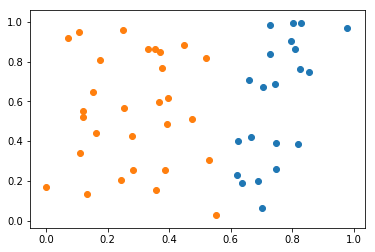

In [112]:
plot_data(fake_data)